## Lab 1

##### Course:Time Series Forecasting with Machine Learning Arabic || سلسلة تحليل السلاسل الزمنيه باستخدام تعليم الآلة شرح باللغة العربية 
##### https://www.youtube.com/@AI_Horizons_Arabic/playlists
##### By: Asmaa Mahmoud Saeed || اعداد وشرح:أسماء محمود سعيد
##### Linkedin https://www.linkedin.com/in/asmaa-m-491750194/
##### Github https://github.com/AsmaaMahmoudSaeed
##### Huggingface https://huggingface.co/AsmaaMahmoudSaeddd


#### Course Sources

* الجامعه الإسلامية بغزة https://www.youtube.com/watch?v=BNprknQU4p4&list=PL9fwy3NUQKwZCbh9PqVo5c2caNsH3zdsW&index=1
* https://app.datacamp.com
* https://towardsdatascience.com/
*https://www.intel.com/content/www/us/en/developer/topic-technology/artificial-intelligence/training/course-time-series-analysis.html
* https://www.geeksforgeeks.org/components-of-time-series-data/
* https://www.datasciencesmachinelearning.com/2018/12/components-of-time-series.html
* https://otexts.com/fpp2/moving-averages.html
* https://online.stat.psu.edu/stat510/lesson/5/5.1

* Book 1:Time Series Analysis with Python Cookbook
* Book 2:Time Series Algorithms Recipes
* Book 3:Introduction to Time Series Forecasting with Python How to Prepare Data and Develop Models to Predict the  Future by Jason Brownlee
* Book 4:Practical Time Series Analysis_ Prediction with Statistics and Machine Learning
* Book 5:deep learning for time series forecasting

### Reading from CSVs 

In [35]:
import pandas as pd
from pathlib import Path
pd.__version__

'2.2.3'

In [36]:
#Python pathlib module provides an object-oriented way to handle filesystem paths.
#"C:\Users\musta\TS Yotube\Lab 1\movieboxoffice.csv"
#"C:\Users\musta\TS Yotube\Lab 1\movieboxoffice.csv"
filepath = Path('C:/Users/musta/TS Yotube/Lab 1/movieboxoffice.csv')


In [37]:
# read movieboxoffice.csv data and parse the Date column (first column) as date
#"C:\Users\musta\TS Yotube\Lab 1\movieboxoffice.csv"
ts = pd.read_csv(filepath,
                 header=0,  #header=0 denotes the first line of data rather than the first line of the file.
                 parse_dates=[0],  # Parse first column
                 index_col=0,  #The index_col parameter sets one or more columns as the DataFrame index, making the specified 
                            #  column(s) act as row labels for easier data referencing
                 
                 usecols=['Date',
                          'DOW',
                          'Daily',
                          'Forecast',
                          'Percent Diff'])
#print(ts.head())

C:\Users\musta\AppData\Local\Temp\ipykernel_20016\3544380206.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts = pd.read_csv(filepath,


In [38]:
ts.head()

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


In [43]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


**Data Cleanup**

In [44]:
ts.dtypes

DOW             object
Daily           object
Forecast        object
Percent Diff    object
dtype: object

In [45]:
type(ts['Daily'][4])

C:\Users\musta\AppData\Local\Temp\ipykernel_20016\796797683.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(ts['Daily'][4])


str

In [46]:
clean = lambda x: x.str.replace('[^\\d.-]', '', regex=True)                                                      
c_df = ts[['Daily', 'Forecast', 'Percent Diff']].apply(clean, axis=1)## axis=1 secect columns
ts[['Daily', 'Forecast', 'Percent Diff']] = c_df.astype(float)         

In [47]:
ts.head()

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,125789.89,235036.46,-46.48
2021-04-27,Saturday,99374.01,197622.55,-49.72
2021-04-28,Sunday,82203.16,116991.26,-29.74
2021-04-29,Monday,33530.26,66652.65,-49.69
2021-04-30,Tuesday,30105.24,34828.19,-13.56


In [48]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOW           128 non-null    object 
 1   Daily         128 non-null    float64
 2   Forecast      128 non-null    float64
 3   Percent Diff  128 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.0+ KB


In [50]:
type(ts['Daily'][4])

C:\Users\musta\AppData\Local\Temp\ipykernel_20016\796797683.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(ts['Daily'][4])


numpy.float64

In [49]:
ts.memory_usage() #Return the memory usage of each column in bytes.

Index           1024
DOW             1024
Daily           1024
Forecast        1024
Percent Diff    1024
dtype: int64

In [12]:
print(ts.shape) 

(128, 4)


In [13]:
ts.memory_usage().sum()

np.int64(5120)

In [14]:
pd.read_csv(filepath).columns

Index(['Date', 'DOW', 'Rank', 'Daily', 'Percent Change', 'Diff (k)',
       'Forecast', 'Percent Diff', 'Theaters', 'To Date', 'Row ID'],
      dtype='object')

##### columns rename

In [15]:
col_names = ['Date', 'Day Name', 'Daily BO', 'Forecast BO']
df = pd.read_csv(filepath, 
                 parse_dates=[0],
                 index_col=0,
                 header=0, 
                 names=col_names, 
                 usecols=[0, 1, 3, 6])
df.head()

C:\Users\musta\AppData\Local\Temp\ipykernel_5308\3471465426.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath,


,Day Name,Daily BO,Forecast BO
Date,,,
2021-04-26,Friday,"$125,789.89","$235,036.46"
2021-04-27,Saturday,"$99,374.01","$197,622.55"
2021-04-28,Sunday,"$82,203.16","$116,991.26"
2021-04-29,Monday,"$33,530.26","$66,652.65"
2021-04-30,Tuesday,"$30,105.24","$34,828.19"


In [16]:
col_names = {
    'Date': 'Date',
    'DOW': 'Day Name',
    'Daily': 'Daily BO',
    'Forecast': 'Forecast BO'
}

df = pd.read_csv(filepath, 
                 parse_dates=[0],
                 index_col=0,
                 usecols=col_names.keys())
df.rename(columns=col_names, inplace=True)

df.head()

C:\Users\musta\AppData\Local\Temp\ipykernel_5308\3505744925.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath,


,Day Name,Daily BO,Forecast BO
Date,,,
2021-04-26,Friday,"$125,789.89","$235,036.46"
2021-04-27,Saturday,"$99,374.01","$197,622.55"
2021-04-28,Sunday,"$82,203.16","$116,991.26"
2021-04-29,Monday,"$33,530.26","$66,652.65"
2021-04-30,Tuesday,"$30,105.24","$34,828.19"


## Using `date  formate`

In [17]:
ts.dtypes

DOW              object
Daily           float64
Forecast        float64
Percent Diff    float64
dtype: object

using the `date_format` parameter 

In [18]:
ts = pd.read_csv(filepath,
                 parse_dates=[0],
                 index_col=0,
                 date_format="%d-%b-%Y",
                 usecols=[0,1,3, 7, 6])
print(ts.head())

                DOW          Daily       Forecast Percent Diff
Date                                                          
26-Apr-21    Friday   $125,789.89    $235,036.46       -46.48%
27-Apr-21  Saturday    $99,374.01    $197,622.55       -49.72%
28-Apr-21    Sunday    $82,203.16    $116,991.26       -29.74%
29-Apr-21    Monday    $33,530.26     $66,652.65       -49.69%
30-Apr-21   Tuesday    $30,105.24     $34,828.19       -13.56%


In [19]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 26-Apr-21 to 31-Aug-21
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


Using `pd.to_datetime()` function  ##### This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [20]:
ts = pd.read_csv(filepath,
                 index_col=0,
                 usecols=[0,1,3, 7, 6])

ts.index = pd.to_datetime(ts.index, format="%d-%b-%y")
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [21]:
ts = pd.read_csv(filepath,
                 header=0,
                 parse_dates=['Date'],
                 index_col=0,
                 #infer_datetime_format= True, # infer_datetime_format is deprecated since version 2.0.0 (already the default)
                 usecols=['Date',
                          'DOW',
                          'Daily',
                          'Forecast',
                          'Percent Diff'])
ts.head()

C:\Users\musta\AppData\Local\Temp\ipykernel_5308\2480265534.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts = pd.read_csv(filepath,


,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


# Recipe 2: Reading data from an Excel file
* Learn how to read data from Excel files using pandas 
* Learn how to read from multiple sheets into DataFrames

* To install openpyxl using conda, run the following command in the terminal:

```
conda install openpyxl
```
* To install using pip, run the following command:

```
pip install openpyxl
```

In [108]:
#!conda install openpyxl -y
#!pip install openpyxl

In [2]:
import pandas as pd
from pathlib import Path
filepath = Path('C:/Users/musta/TS Yotube/Lab 1/sales_trx_data.xlsx')

In [3]:
filepath.exists()

True

In [4]:
import openpyxl
openpyxl.__version__

'3.1.5'

In [5]:
excelfile = pd.ExcelFile(filepath)#object
excelfile.sheet_names

['2017', '2018']

In [6]:
excelfile.parse('2017')

,Line_Item_ID,Date,Credit_Card_Number,Quantity,Menu_Item
0,1,2017-01-01,7437926611570790,1,spicy miso ramen
1,2,2017-01-01,7437926611570790,1,spicy miso ramen
2,3,2017-01-01,8421920068932810,3,tori paitan ramen
3,4,2017-01-01,8421920068932810,3,tori paitan ramen
4,5,2017-01-01,4787310681569640,1,truffle butter ramen
...,...,...,...,...,...
36759,36760,2017-12-31,3149176814183170,4,vegetarian curry + king trumpet mushroom ramen
36760,36761,2017-12-31,2005206728506200,1,tonkotsu ramen
36761,36762,2017-12-31,2005206728506200,1,tonkotsu ramen
36762,36763,2017-12-31,1130414909788170,2,soft-shell miso crab ramen


In [7]:
file2 = pd.ExcelFile(filepath)
file2.parse(sheet_name='2017',
                index_col=1,
                parse_dates=True).head()



,Line_Item_ID,Credit_Card_Number,Quantity,Menu_Item
Date,,,,
2017-01-01,1,7437926611570790,1,spicy miso ramen
2017-01-01,2,7437926611570790,1,spicy miso ramen
2017-01-01,3,8421920068932810,3,tori paitan ramen
2017-01-01,4,8421920068932810,3,tori paitan ramen
2017-01-01,5,4787310681569640,1,truffle butter ramen


In [8]:
ts = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=[0,1],
                    parse_dates=True)
ts.keys()

dict_keys([0, 1])

In [9]:
ts = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=['2017','2018'],
                    parse_dates=True)
ts.keys()

dict_keys(['2017', '2018'])

In [10]:
ts = pd.read_excel(filepath,
                    engine='openpyxl',
                    index_col=1,
                    sheet_name=None,
                    parse_dates=True)
ts.keys()

dict_keys(['2017', '2018'])

In [11]:
ts['2017'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36764 entries, 2017-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        36764 non-null  int64 
 1   Credit_Card_Number  36764 non-null  int64 
 2   Quantity            36764 non-null  int64 
 3   Menu_Item           36764 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [12]:
ts['2018'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37360 entries, 2018-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        37360 non-null  int64 
 1   Credit_Card_Number  37360 non-null  int64 
 2   Quantity            37360 non-null  int64 
 3   Menu_Item           37360 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


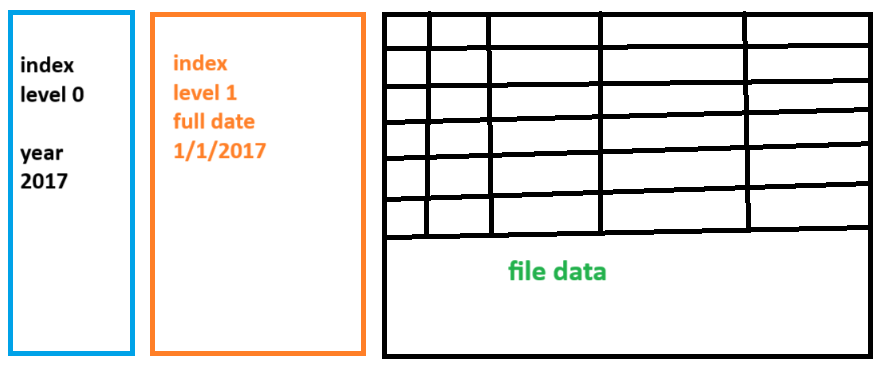

In [13]:
ts_combined = pd.concat([ts['2017'],ts['2018']])

In [14]:
ts_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74124 entries, 2017-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        74124 non-null  int64 
 1   Credit_Card_Number  74124 non-null  int64 
 2   Quantity            74124 non-null  int64 
 3   Menu_Item           74124 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.8+ MB


In [15]:
pd.concat(ts).index

MultiIndex([('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ('2017', '2017-01-01'),
            ...
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31'),
            ('2018', '2018-12-31')],
           names=[None, 'Date'], length=74124)

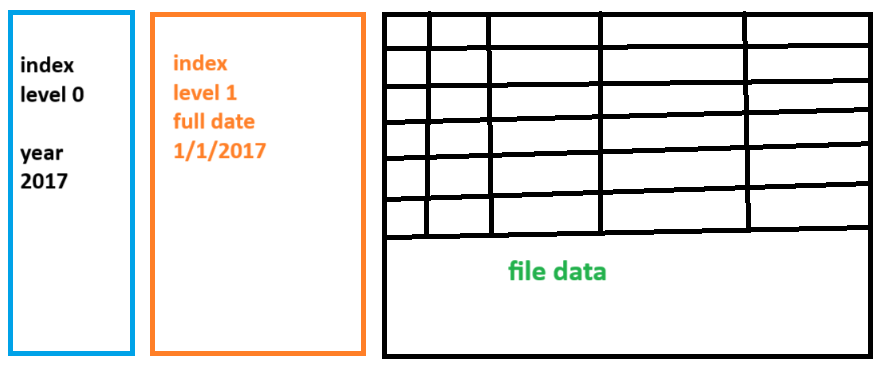

In [16]:
ts_combined = pd.concat(ts).droplevel(level=0)
print(ts_combined.head())

            Line_Item_ID  Credit_Card_Number  Quantity             Menu_Item
Date                                                                        
2017-01-01             1    7437926611570790         1      spicy miso ramen
2017-01-01             2    7437926611570790         1      spicy miso ramen
2017-01-01             3    8421920068932810         3     tori paitan ramen
2017-01-01             4    8421920068932810         3     tori paitan ramen
2017-01-01             5    4787310681569640         1  truffle butter ramen


In [17]:
ts = pd.read_excel(filepath,
                   index_col=1,
                   sheet_name='2018',
                   parse_dates=True)
type(ts)

pandas.core.frame.DataFrame

# Recipe 3: Reading data from a URL


In [42]:
#!conda install boto3 s3fs html5lib lxml -y
#!pip install boto3 s3fs html5lib lxml

* To install using pip, you can use the following command:

```
pip install boto3 s3fs lxml
```

* To install using Conda, you can use:

```
conda install boto3 s3fs lxml -y
```

In [43]:
import pandas as pd

## Reading from GitHub

In [23]:
# example of produced error
url = 'https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook-Second-Edition/blob/main/datasets/Ch2/AirQualityUCI.csv'
# pd.read_csv(url)


In [24]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook-Second-Edition/refs/heads/main/datasets/Ch2/AirQualityUCI.csv'

df = pd.read_csv(url,
                 delimiter=';',
                 parse_dates=['Date'],
                 index_col='Date')

df.iloc[:3,1:4]

,CO(GT),PT08.S1(CO),NMHC(GT)
Date,,,
10/03/2004,2.6,1360.00,150
10/03/2004,2.0,1292.25,112
10/03/2004,2.2,1402.00,88


In [26]:
date_parser = lambda x: pd.to_datetime(x,format="%d/%m/%Y")
df = pd.read_csv(url,
                delimiter=';',
                index_col='Date',
                date_parser=date_parser)
df.iloc[:3,1:4]

C:\Users\musta\AppData\Local\Temp\ipykernel_20016\2784474071.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(url,


,CO(GT),PT08.S1(CO),NMHC(GT)
Date,,,
2004-03-10,2.6,1360.00,150
2004-03-10,2.0,1292.25,112
2004-03-10,2.2,1402.00,88
